### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [2]:
samples_diff = np.random.choice(sample_data[sample_data['drinks_coffee']]['height'], size=(10000, 200), replace=True).mean(axis=1) - np.random.choice(sample_data[sample_data['drinks_coffee'] == False]['height'], size=(10000, 200), replace=True).mean(axis=1)

(array([  24.,  117.,  534., 1580., 2644., 2587., 1696.,  641.,  154.,
          23.]),
 array([0.16973857, 0.39960413, 0.62946969, 0.85933525, 1.08920081,
        1.31906637, 1.54893193, 1.77879749, 2.00866305, 2.23852861,
        2.46839418]),
 <BarContainer object of 10 artists>)

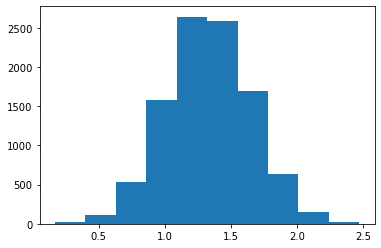

In [3]:
plt.hist(samples_diff)

In [4]:
np.percentile(samples_diff, 0.5), np.percentile(samples_diff, 99.5)

(0.4907544207398682, 2.147825646045582)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [5]:
samples_diff = np.random.choice(sample_data[sample_data['age'] == '>=21']['height'], size=(10000, 200), replace=True).mean(axis=1) - np.random.choice(sample_data[sample_data['age'] == '<21']['height'], size=(10000, 200), replace=True).mean(axis=1)

(array([  12.,  104.,  505., 1524., 2687., 2741., 1666.,  623.,  119.,
          19.]),
 array([3.35867433, 3.53401101, 3.70934769, 3.88468437, 4.06002105,
        4.23535773, 4.41069441, 4.58603109, 4.76136777, 4.93670445,
        5.11204113]),
 <BarContainer object of 10 artists>)

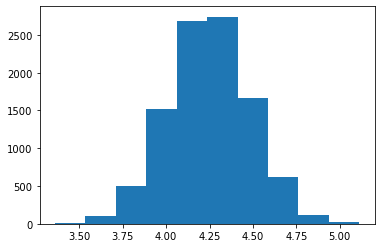

In [6]:
plt.hist(samples_diff)

In [7]:
np.percentile(samples_diff, 0.5), np.percentile(samples_diff, 99.5)

(3.631837997704049, 4.849703896488102)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

-2.271243527343653 -1.427233258948792


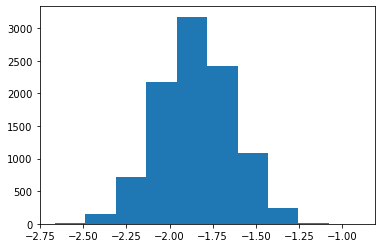

In [8]:
samples_diff = np.random.choice(sample_data[(sample_data['drinks_coffee'] == True) & (sample_data['age'] == '<21')]['height'], size=(10000, 200), replace=True).mean(axis=1) - np.random.choice(sample_data[(sample_data['drinks_coffee'] == False) & (sample_data['age'] == '<21')]['height'], size=(10000, 200), replace=True).mean(axis=1)
print(np.percentile(samples_diff, 2.5), np.percentile(samples_diff, 97.5))
plt.hist(samples_diff);

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

-3.4951854389708514 -2.7281777737790165


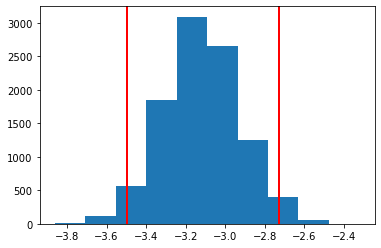

In [9]:
samples_diff = np.random.choice(sample_data[(sample_data['drinks_coffee'] == True) & (sample_data['age'] == '>=21')]['height'], size=(10000, 200), replace=True).mean(axis=1) - np.random.choice(sample_data[(sample_data['drinks_coffee'] == False) & (sample_data['age'] == '>=21')]['height'], size=(10000, 200), replace=True).mean(axis=1)

lower, upper = np.percentile(samples_diff, 2.5), np.percentile(samples_diff, 97.5)
print(lower, upper)

plt.hist(samples_diff)
plt.axvline(x=lower, color='r', linewidth=2)
plt.axvline(x=upper, color='r', linewidth=2)